In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

In [2]:
data= pd.read_excel("default of credit card clients.xls",header=1)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


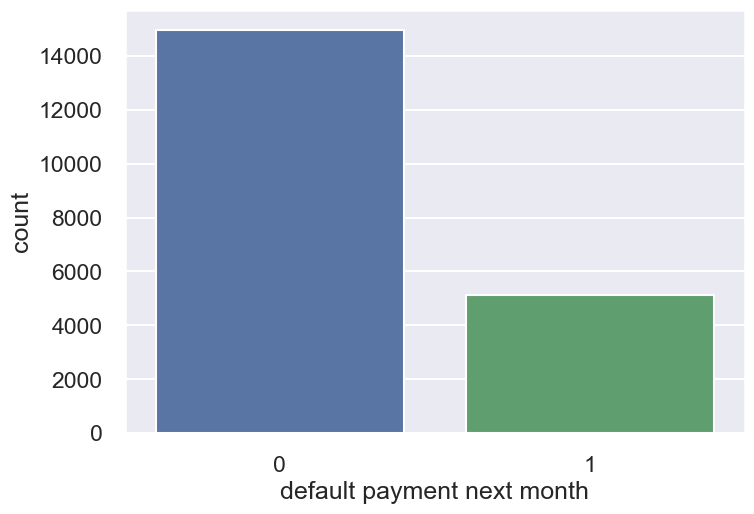

In [34]:

sns.countplot(x='default payment next month',data=data)

### splitting the dataset into Categorical and Numerical variables subsets

In [3]:
data_cont= data[['ID','LIMIT_BAL','AGE','BILL_AMT1', 'BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
data_cont.describe()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,8660.398374,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,1.000000,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,15000.500000,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,22500.250000,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,30000.000000,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


## Check for multi-colinearity

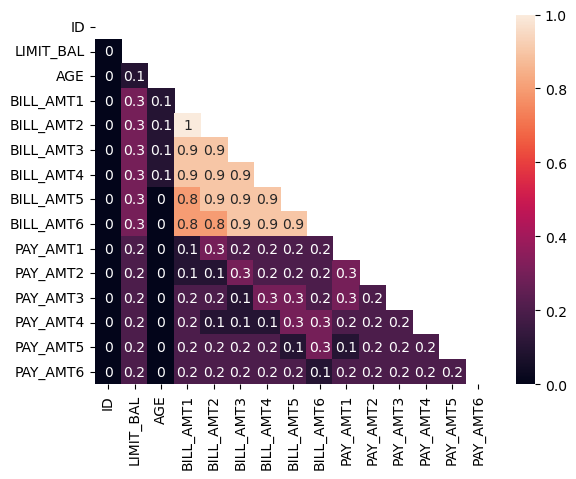

In [4]:
corr = data_cont.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
ax = sns.heatmap(round(corr,1), annot=True);


### Remove columns BILL_AMT2, BILL_AMT3 BILL_AMT4, BILL_AMT5, BILL_AMT6 as they have high co-relation to column BILL_AMT1 . This could lead to multi-colinearity and duplication of data 

In [5]:
data=data.drop(columns=['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], axis=0)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,2000,36681,10000,9000,689,679,0


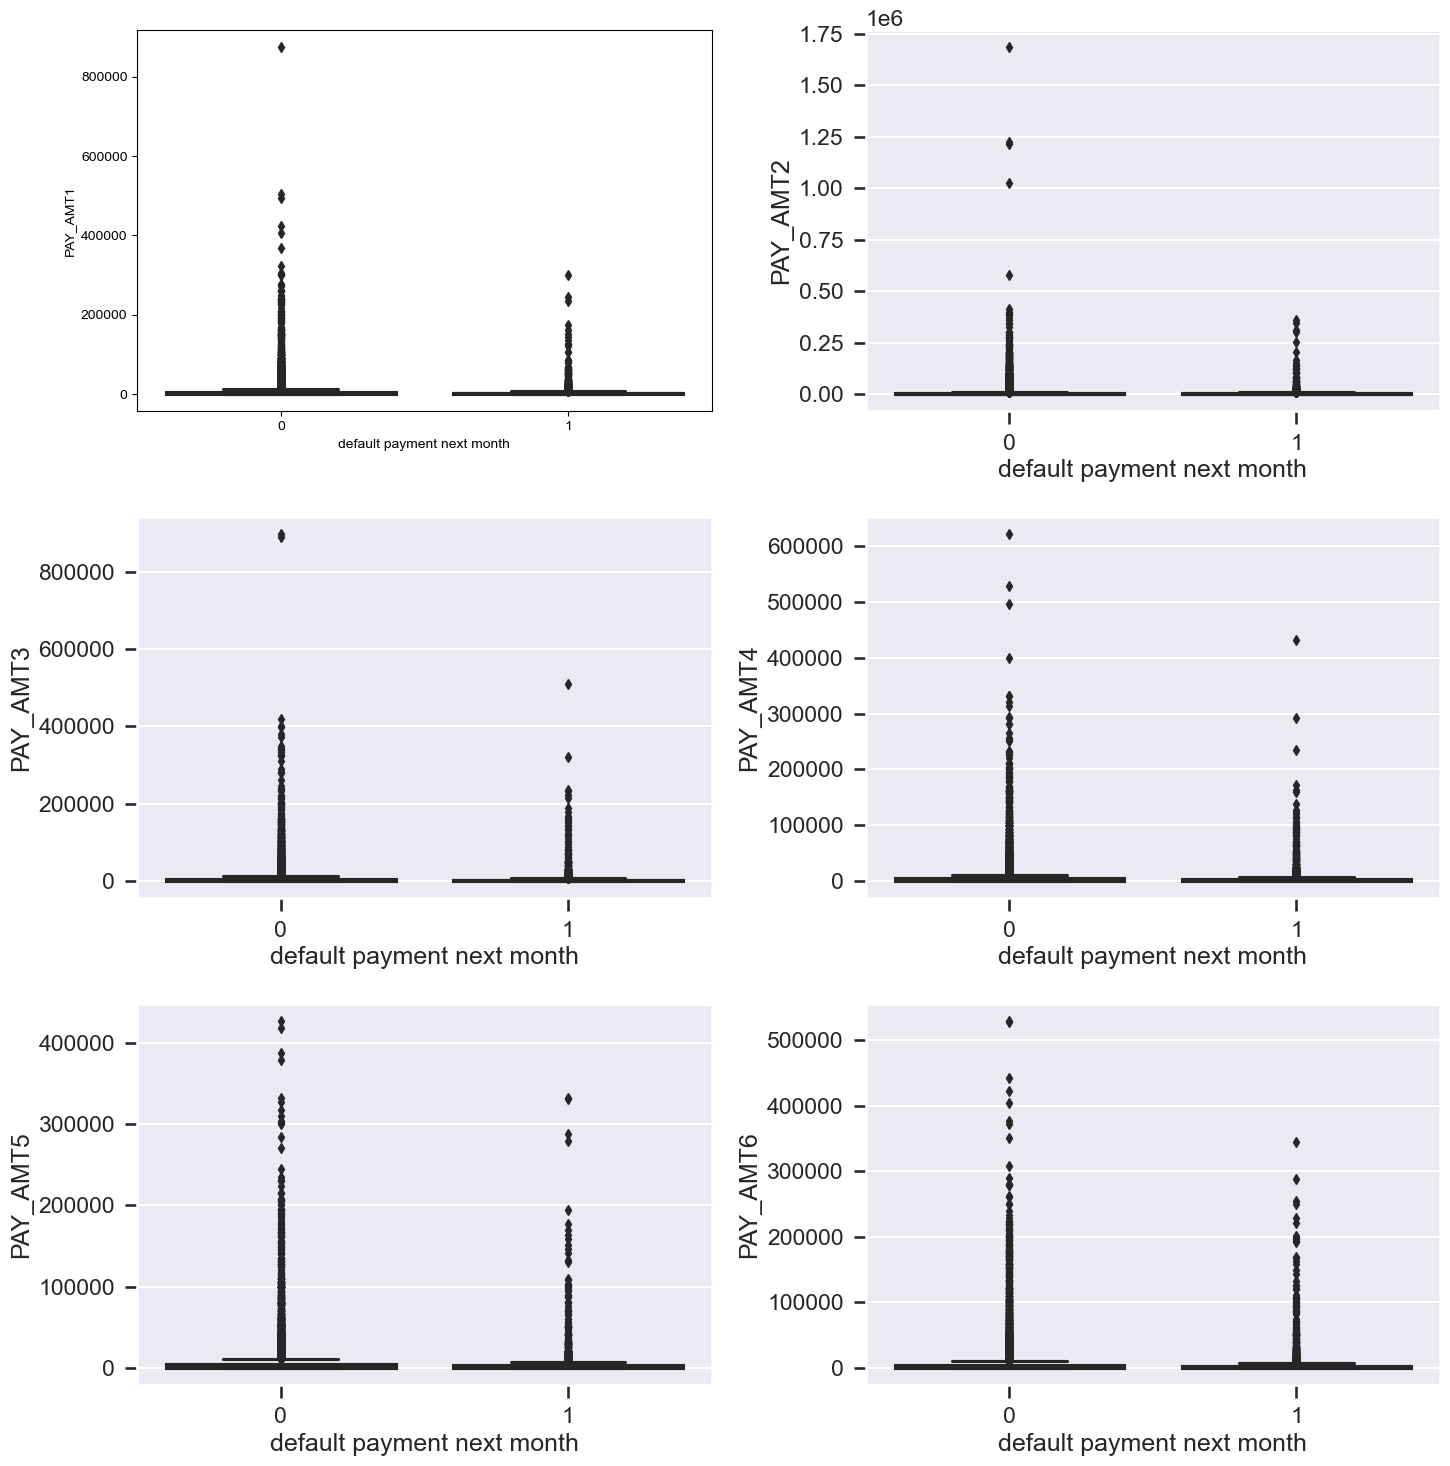

In [6]:
oe=['r','g']
fig = plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=data, y="PAY_AMT1",x='default payment next month',palette=oe)


plt.subplot(3,2,2)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=data, y="PAY_AMT2",x='default payment next month',palette=oe)


plt.subplot(3,2,3)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=data, y="PAY_AMT3",x='default payment next month',palette=oe)


plt.subplot(3,2,4)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=data, y="PAY_AMT4",x='default payment next month',palette=oe)


plt.subplot(3,2,5)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=data, y="PAY_AMT5",x='default payment next month',palette=oe)

plt.subplot(3,2,6)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=data, y="PAY_AMT6",x='default payment next month',palette=oe)
plt.show()

## check for missing values : No missing values


In [7]:
data.isnull().values.any()

False

In [8]:
 class outlier_functions :
        def __init__(self,df,df_full) :
            self.df =df
            self.df_full=df_full
            self.col_names= [i for i in self.df.columns]
        
        def outliers_mapping(self):
            self.outlier_list={}
            for i in self.col_names:
                q75, q25 = np.percentile(self.df[i], [75 ,25]) 
                iqr = q75 - q25
                self.k= [q25-1.5*iqr,q75+1.5*iqr]
                self.outlier_list[i]=self.k    
            
        
        def remove_outliers(self):
            self.l=[]
            self.outliers_mapping()
            for i in self.col_names :
                self.lap=list(self.df[(self.df[i]>self.outlier_list[i][0]) & (self.df[i]<self.outlier_list[i][1])].index)
                self.df_full=self.df_full.filter(items = self.lap, axis=0)
            return self.df_full
    
        

In [23]:
def outliers(df):
    col_names= [i for i in df.columns]
    outlier_list={}
    for i in col_names:
        q75, q25 = np.percentile(df[i], [75 ,25]) 
        iqr = q75 - q25
        k= [q25-1.5*iqr,q75+1.5*iqr]
        outlier_list[i]=k
        print('For column ', i )
        print('q75: ',q75)
        print('q25: ',q25)
        print('Inter Quartile Range: ',iqr)
        print('Outliers lie before', q25-1.5*iqr, 'and beyond', q75+1.5*iqr) 

    # Usually 1.5 times IQR is considered, but we have used 1.5 for broader range

        print('Number of Rows with Left Extreme Outliers:', 
              len(df[df[i] < q25-1.5*iqr]))
        print('Number of Rows with Right Extreme Outliers:', 
              len(df[df[i]> q75+1.5*iqr]))
        print('\n')
        
        plt.tight_layout()
        plt.style.use('seaborn')
        sns.set_context('notebook')
        sns.histplot(data=data, x=df[i], hue="default payment next month",multiple="stack",
                 kde=True)#,palette= oe
        plt.show()


For column  ID
q75:  22500.25
q25:  7500.75
Inter Quartile Range:  14999.5
Outliers lie before -14998.5 and beyond 44999.5
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 0




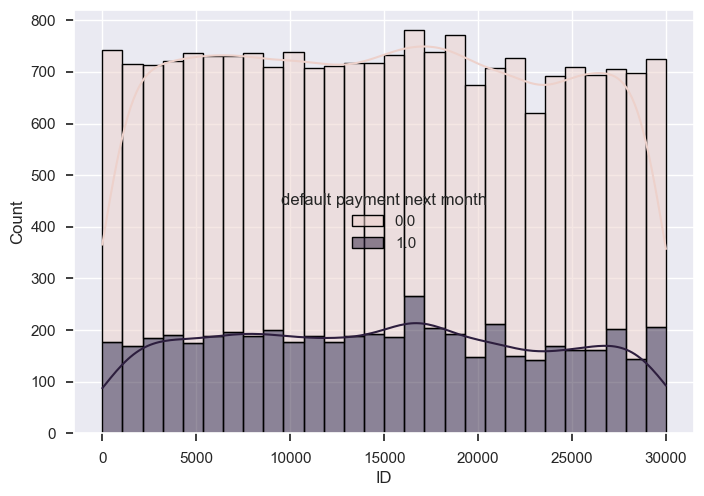

For column  LIMIT_BAL
q75:  240000.0
q25:  50000.0
Inter Quartile Range:  190000.0
Outliers lie before -235000.0 and beyond 525000.0
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 167




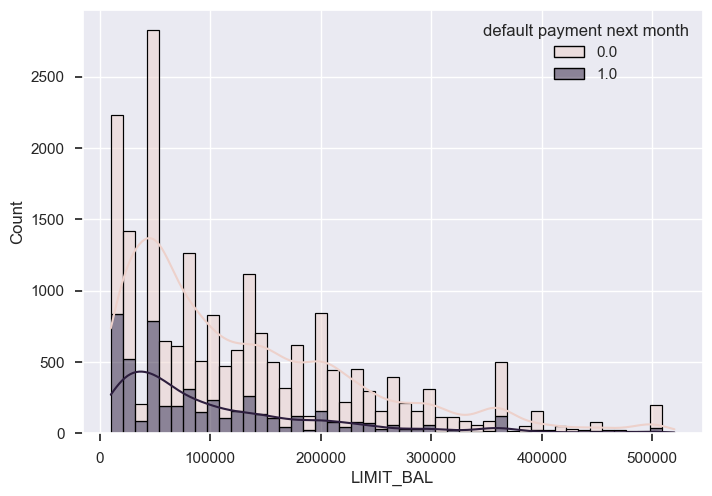

For column  AGE
q75:  41.0
q25:  28.0
Inter Quartile Range:  13.0
Outliers lie before 8.5 and beyond 60.5
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 272




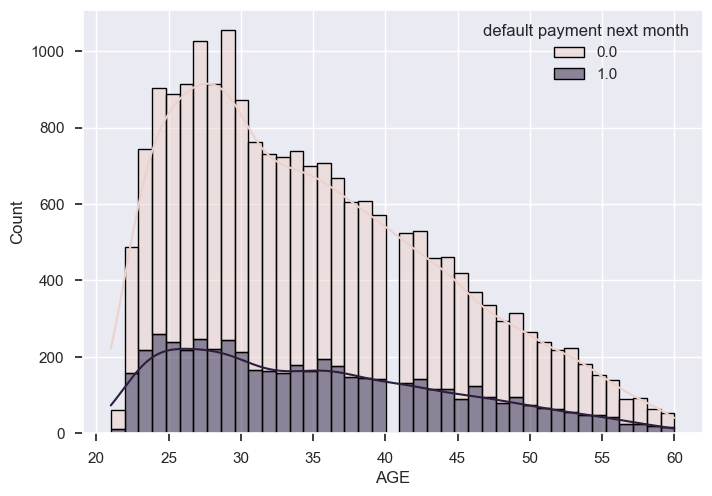

For column  BILL_AMT1
q75:  67091.0
q25:  3558.75
Inter Quartile Range:  63532.25
Outliers lie before -91739.625 and beyond 162389.375
Number of Rows with Left Extreme Outliers: 2
Number of Rows with Right Extreme Outliers: 2398




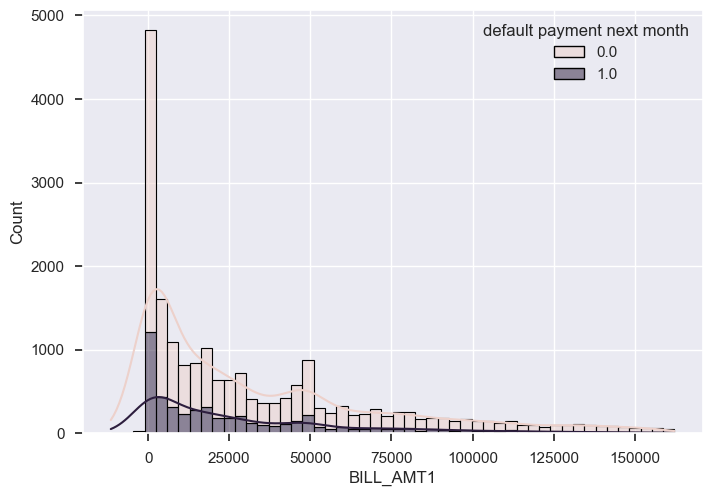

For column  PAY_AMT1
q75:  5006.0
q25:  1000.0
Inter Quartile Range:  4006.0
Outliers lie before -5009.0 and beyond 11015.0
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 2745




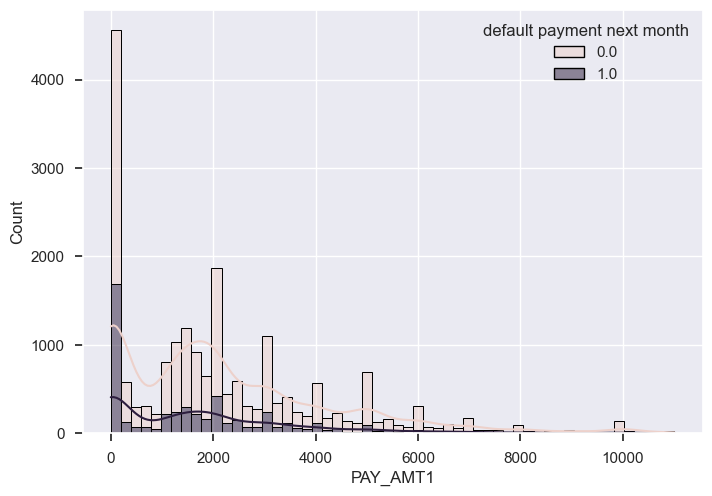

For column  PAY_AMT2
q75:  5000.0
q25:  833.0
Inter Quartile Range:  4167.0
Outliers lie before -5417.5 and beyond 11250.5
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 2714




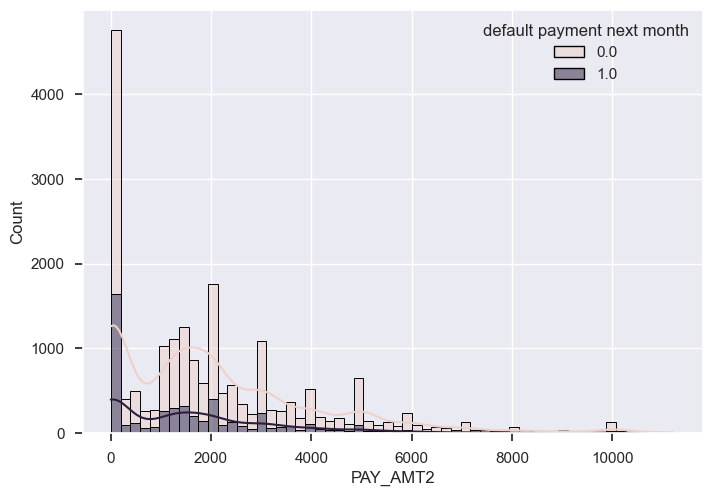

For column  PAY_AMT3
q75:  4505.0
q25:  390.0
Inter Quartile Range:  4115.0
Outliers lie before -5782.5 and beyond 10677.5
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 2598




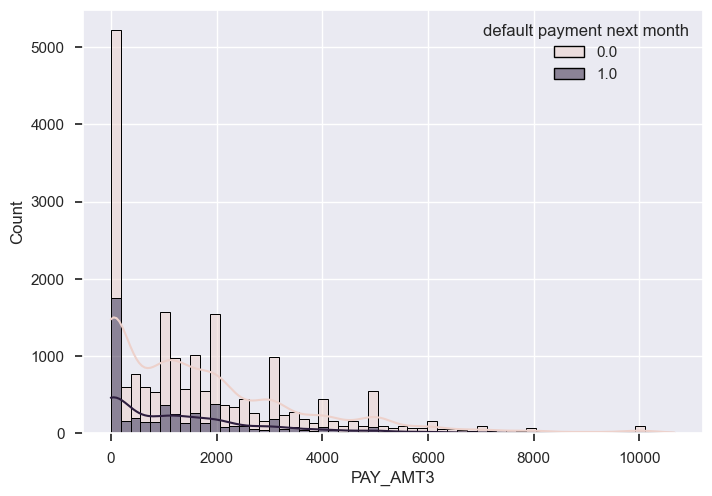

For column  PAY_AMT4
q75:  4013.25
q25:  296.0
Inter Quartile Range:  3717.25
Outliers lie before -5279.875 and beyond 9589.125
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 2994




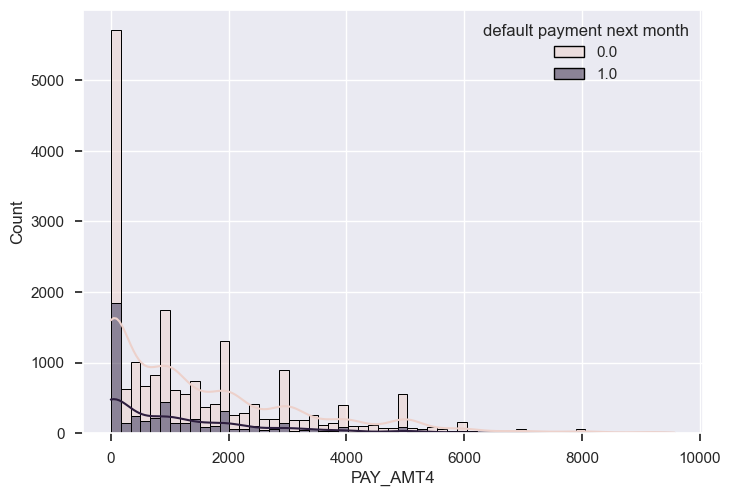

For column  PAY_AMT5
q75:  4031.5
q25:  252.5
Inter Quartile Range:  3779.0
Outliers lie before -5416.0 and beyond 9700.0
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 2945




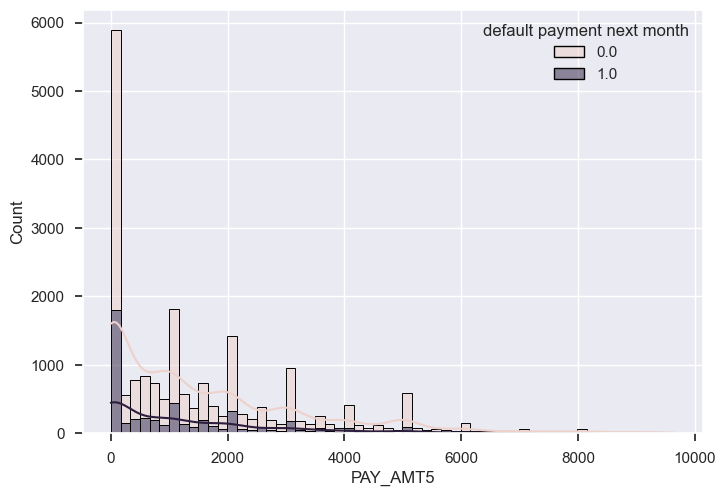

For column  PAY_AMT6
q75:  4000.0
q25:  117.75
Inter Quartile Range:  3882.25
Outliers lie before -5705.625 and beyond 9823.375
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 2958




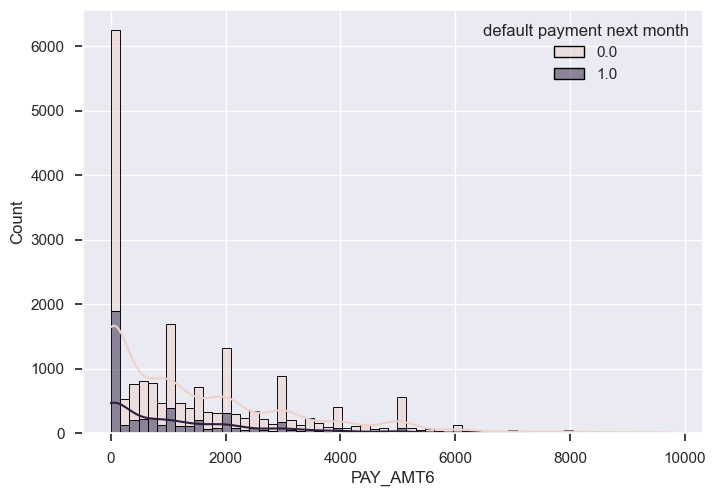

In [24]:
outliers(data_cont)

In [10]:
data_cont= data[['ID','LIMIT_BAL','AGE','BILL_AMT1','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
data_cont

,ID,LIMIT_BAL,AGE,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,24,3913,0,689,0,0,0,0
1,2,120000,26,2682,0,1000,1000,1000,0,2000
2,3,90000,34,29239,1518,1500,1000,1000,1000,5000
3,4,50000,37,46990,2000,2019,1200,1100,1069,1000
4,5,50000,57,8617,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,39,188948,8500,20000,5003,3047,5000,1000
29996,29997,150000,43,1683,1837,3526,8998,129,0,0
29997,29998,30000,37,3565,0,0,22000,4200,2000,3100
29998,29999,80000,41,-1645,85900,3409,1178,1926,52964,1804


### removing outliers

In [12]:
p1=outlier_functions(data_cont,data)

### The thresholds for outliers

In [13]:
p1.outliers_mapping()
p1.outlier_list

{'ID': [-14998.5, 44999.5],
 'LIMIT_BAL': [-235000.0, 525000.0],
 'AGE': [8.5, 60.5],
 'BILL_AMT1': [-91739.625, 162389.375],
 'PAY_AMT1': [-5009.0, 11015.0],
 'PAY_AMT2': [-5417.5, 11250.5],
 'PAY_AMT3': [-5782.5, 10677.5],
 'PAY_AMT4': [-5279.875, 9589.125],
 'PAY_AMT5': [-5416.0, 9700.0],
 'PAY_AMT6': [-5705.625, 9823.375]}

### Removing all the values for each column that lie outside the thrsholds

In [35]:
data= p1.remove_outliers()
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,2000,2019,1200,1100,1069,1000,0
5,6,50000,1,1,2,37,0,0,0,0,0,0,64400,2500,1815,657,1000,1000,800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29991,29992,210000,1,2,1,34,3,2,2,2,2,2,2500,0,0,0,0,0,0,1
29992,29993,10000,1,3,1,43,0,0,0,-2,-2,-2,8802,2000,0,0,0,0,0,0
29994,29995,80000,1,2,2,34,2,2,2,2,2,2,72557,7000,3500,0,7000,0,4000,1
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1837,3526,8998,129,0,0,0


### Boxplots after removing outliers

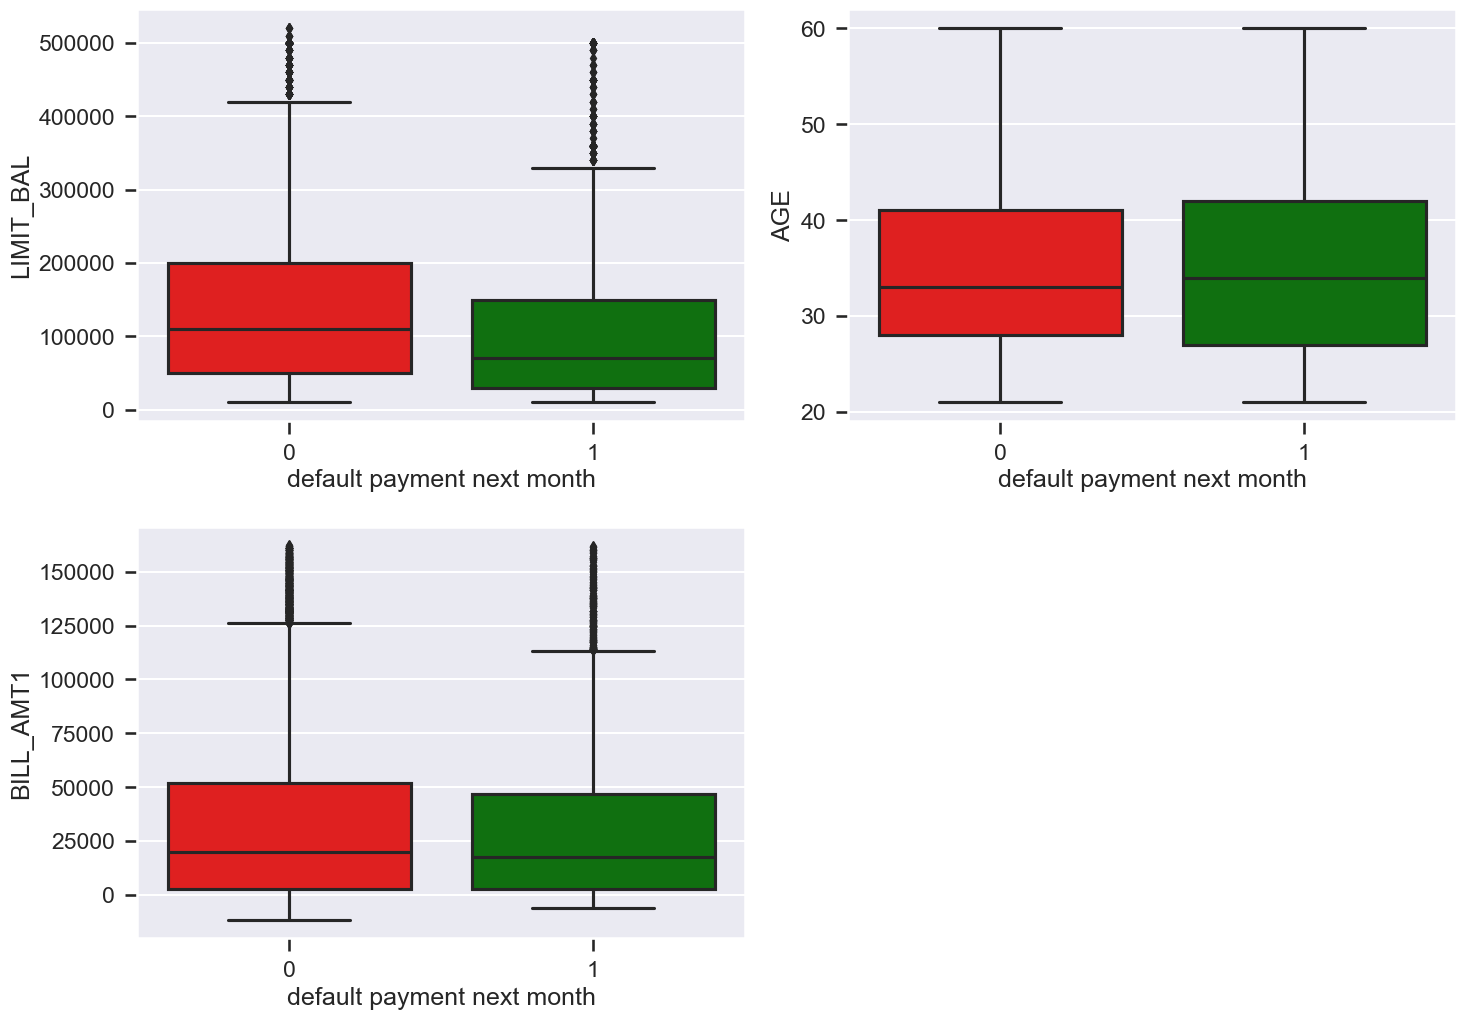

In [15]:
oe=['r','g']
fig = plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=data, y="LIMIT_BAL",x='default payment next month',palette=oe)


plt.subplot(3,2,2)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=data, y="AGE",x='default payment next month',palette=oe)

plt.subplot(3,2,3)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=data, y="BILL_AMT1",x='default payment next month',palette=oe)



C:\Users\anand\AppData\Local\Temp\ipykernel_28076\2730801452.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3,2,1)
C:\Users\anand\AppData\Local\Temp\ipykernel_28076\2730801452.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3,2,2)
C:\Users\anand\AppData\Local\Temp\ipykernel_28076\2730801452.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently

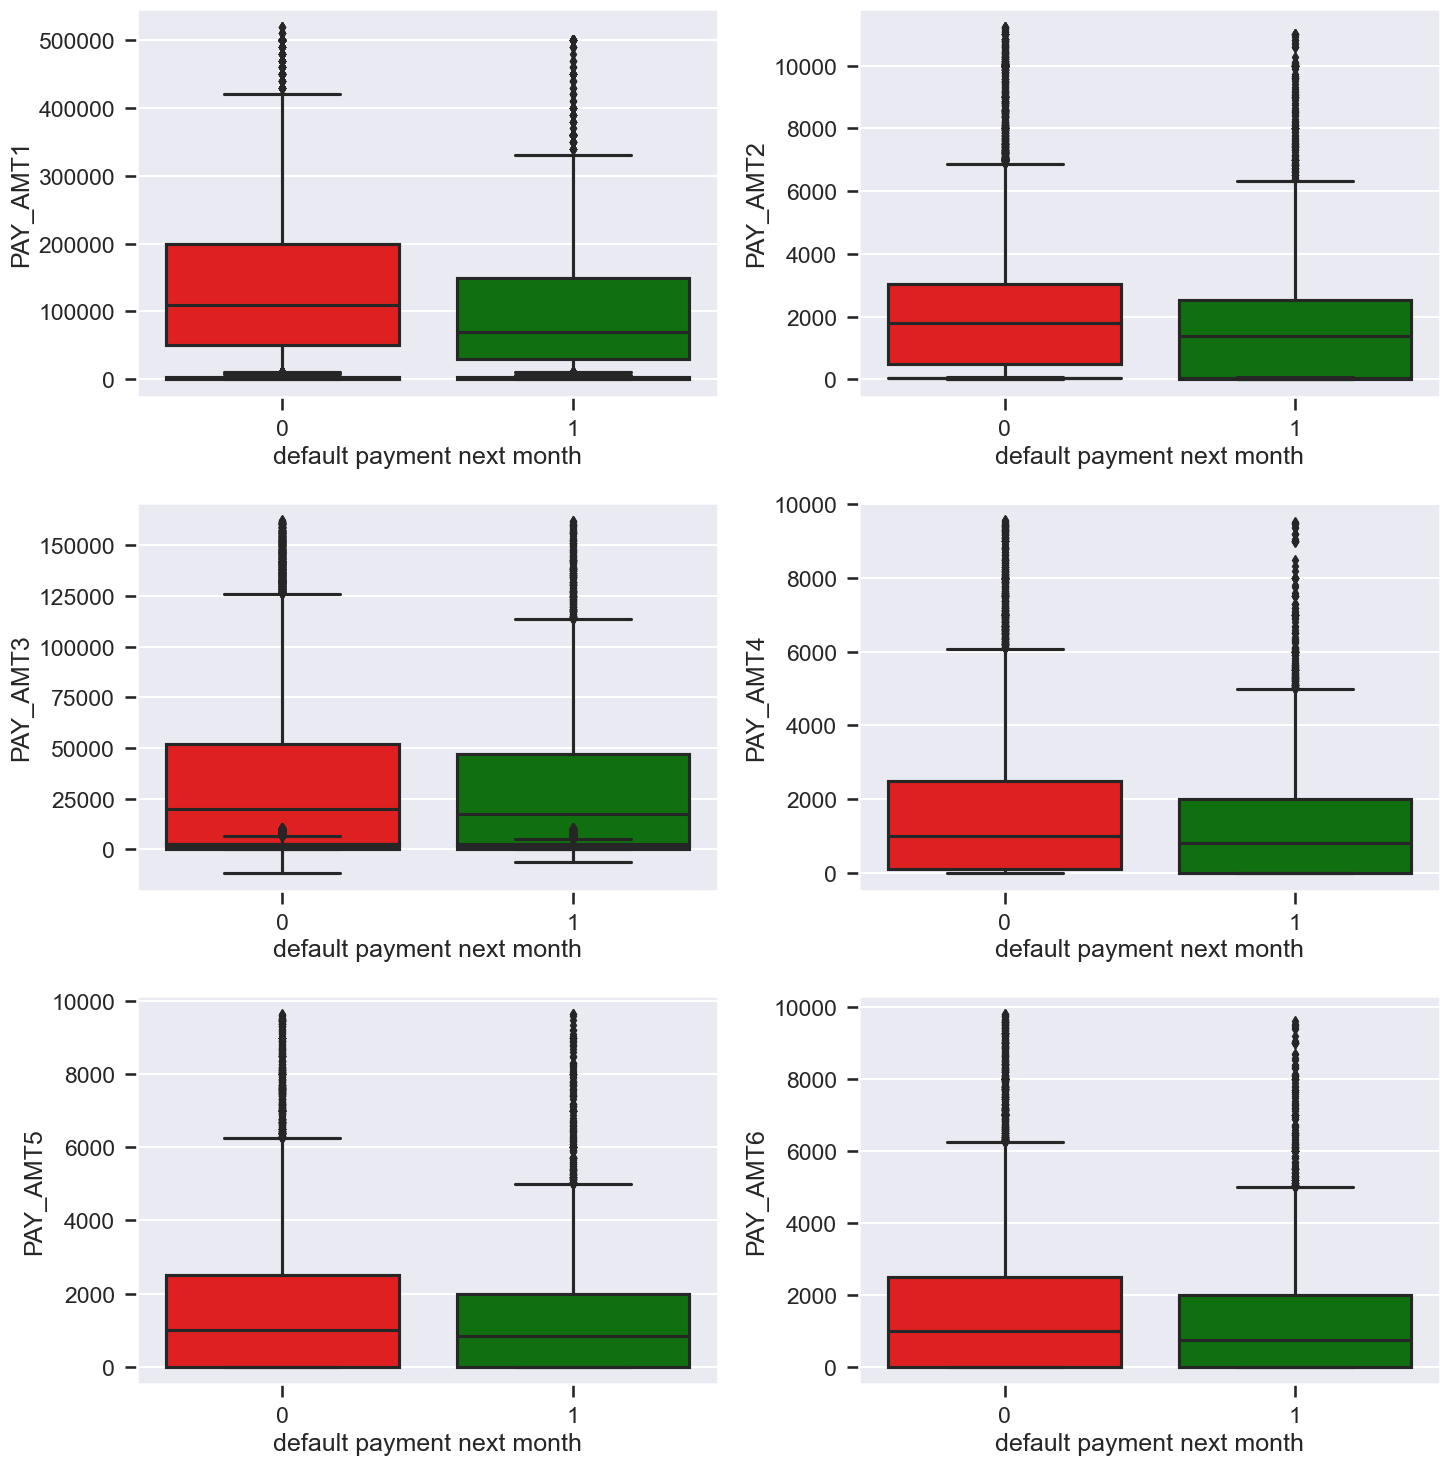

In [16]:
oe=['r','g']
fig = plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=data, y="LIMIT_BAL",x='default payment next month',palette=oe)


plt.subplot(3,2,2)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=data, y="AGE",x='default payment next month',palette=oe)

plt.subplot(3,2,3)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=data, y="BILL_AMT1",x='default payment next month',palette=oe)




plt.subplot(3,2,1)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=data, y="PAY_AMT1",x='default payment next month',palette=oe)


plt.subplot(3,2,2)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=data, y="PAY_AMT2",x='default payment next month',palette=oe)


plt.subplot(3,2,3)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=data, y="PAY_AMT3",x='default payment next month',palette=oe)


plt.subplot(3,2,4)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=data, y="PAY_AMT4",x='default payment next month',palette=oe)


plt.subplot(3,2,5)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=data, y="PAY_AMT5",x='default payment next month',palette=oe)

plt.subplot(3,2,6)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.boxplot(data=data, y="PAY_AMT6",x='default payment next month',palette=oe)
plt.show()

### Categorical Variables


In [50]:
data_categorical= data[['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6',]]
data_categorical.head()

,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,2,1,2,2,-1,-1,-2,-2
1,2,2,2,-1,2,0,0,0,2
2,2,2,2,0,0,0,0,0,0
3,2,2,1,0,0,0,0,0,0
5,1,1,2,0,0,0,0,0,0


## Unique values in each of the  categorical variables

In [51]:

k= [i for i in data_categorical.columns]
for i in k : 
    print('Unique values in categorical variable ', i , 'are' , set (data_categorical[i]))
    

Unique values in categorical variable  SEX are {1, 2}
Unique values in categorical variable  EDUCATION are {0, 1, 2, 3, 4, 5, 6}
Unique values in categorical variable  MARRIAGE are {0, 1, 2, 3}
Unique values in categorical variable  PAY_0 are {0, 1, 2, 3, 4, 5, 6, 7, 8, -2, -1}
Unique values in categorical variable  PAY_2 are {0, 1, 2, 3, 4, 5, 6, 7, 8, -2, -1}
Unique values in categorical variable  PAY_3 are {0, 1, 2, 3, 4, 5, 6, 7, 8, -2, -1}
Unique values in categorical variable  PAY_4 are {0, 2, 3, 4, 5, 6, 7, 8, -2, -1}
Unique values in categorical variable  PAY_5 are {0, 2, 3, 4, 5, 6, 7, 8, -1, -2}
Unique values in categorical variable  PAY_6 are {0, 2, 3, 4, 5, 6, 7, 8, -1, -2}


#### Count of unqiue values for each variable 

In [60]:
data_categorical= data[['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6',]]
k= [i for i in data_categorical.columns]
for i in k : 
    print('Unique values in categorical variable ', i , 'are' , set (data_categorical[i]))
    print ('\n')
    print ('And the count of unique elements for this variable are ')
    print (data_categorical[i].value_counts())
    print ('\n')
    print ('-----------------------------')
    

Unique values in categorical variable  SEX are {1, 2}


And the count of unique elements for this variable are 
2    12167
1     7936
Name: SEX, dtype: int64


-----------------------------
Unique values in categorical variable  EDUCATION are {0, 1, 2, 3, 4, 5, 6}


And the count of unique elements for this variable are 
2    9847
1    6409
3    3582
5     160
4      68
6      29
0       8
Name: EDUCATION, dtype: int64


-----------------------------
Unique values in categorical variable  MARRIAGE are {0, 1, 2, 3}


And the count of unique elements for this variable are 
2    10781
1     9047
3      233
0       42
Name: MARRIAGE, dtype: int64


-----------------------------
Unique values in categorical variable  PAY_0 are {0, 1, 2, 3, 4, 5, 6, 7, 8, -2, -1}


And the count of unique elements for this variable are 
 0    9764
-1    3280
 1    2903
 2    2087
-2    1676
 3     285
 4      60
 5      19
 8      15
 6       9
 7       5
Name: PAY_0, dtype: int64


-------------------------

#### Data processing for categorical variables 

##### Variable 'PAY' 

In [61]:
for i in k : 
    if re.search('^PAY+',i) :
        data[i]=data[i].replace(list(set(data[i][data[i]>0])),'Payment Delayed')
        data[i]=data[i].replace([0,-1,-2],'Paid Duly')

    else: 
        continue

In [40]:
#Unqiue values in column PAY

In [63]:
#data_categorical= data[['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6',]]
k= [i for i in data_categorical.columns]
for i in k : 
    if re.search('^PAY+',i) :
        
        print('Unique values in categorical variable ', i , 'are' , set (data_categorical[i]))
        print ('\n')
        print ('And the count of unique elements for this variable are ')
        print (data[i].value_counts())
        print ('\n')
        print ('-----------------------------')
    else: 
        continue

    

Unique values in categorical variable  PAY_0 are {0, 1, 2, 3, 4, 5, 6, 7, 8, -2, -1}


And the count of unique elements for this variable are 
Paid Duly          14720
Payment Delayed     5383
Name: PAY_0, dtype: int64


-----------------------------
Unique values in categorical variable  PAY_2 are {0, 1, 2, 3, 4, 5, 6, 7, 8, -2, -1}


And the count of unique elements for this variable are 
Paid Duly          16520
Payment Delayed     3583
Name: PAY_2, dtype: int64


-----------------------------
Unique values in categorical variable  PAY_3 are {0, 1, 2, 3, 4, 5, 6, 7, 8, -2, -1}


And the count of unique elements for this variable are 
Paid Duly          16671
Payment Delayed     3432
Name: PAY_3, dtype: int64


-----------------------------
Unique values in categorical variable  PAY_4 are {0, 2, 3, 4, 5, 6, 7, 8, -2, -1}


And the count of unique elements for this variable are 
Paid Duly          17206
Payment Delayed     2897
Name: PAY_4, dtype: int64


-----------------------------

##### Processing Variable 'SEX'

In [64]:
data['SEX']= data['SEX'].map({1:'Male', 2 :'Female'})

In [66]:
data['SEX'].value_counts()

Female    12167
Male       7936
Name: SEX, dtype: int64

##### Processing Variable 'Education'

###### Grouping  { 1=graduate school, 2=university}  into one category  called Graduate 

###### Grouping {  School, 4=others, 5=unknown, 6=unknown } into one category called Others

###### ------------------------------------------------------------------------------------------------------------------------

###### Before grouping

In [67]:
data['EDUCATION'].value_counts()

2    9847
1    6409
3    3582
5     160
4      68
6      29
0       8
Name: EDUCATION, dtype: int64

In [68]:
data['EDUCATION']= data['EDUCATION'].map({0 :'Others',1:'Graduate',2:'Graduate',3 : 'Others', 4 :'Others',5 :'Others',6 :'Others'})


In [70]:
data['EDUCATION'].value_counts()

Graduate    16256
Others       3847
Name: EDUCATION, dtype: int64

In [71]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,Female,Graduate,1,24,Payment Delayed,Payment Delayed,Paid Duly,Paid Duly,Paid Duly,Paid Duly,3913,0,689,0,0,0,0,1
1,2,120000,Female,Graduate,2,26,Paid Duly,Payment Delayed,Paid Duly,Paid Duly,Paid Duly,Payment Delayed,2682,0,1000,1000,1000,0,2000,1
2,3,90000,Female,Graduate,2,34,Paid Duly,Paid Duly,Paid Duly,Paid Duly,Paid Duly,Paid Duly,29239,1518,1500,1000,1000,1000,5000,0
3,4,50000,Female,Graduate,1,37,Paid Duly,Paid Duly,Paid Duly,Paid Duly,Paid Duly,Paid Duly,46990,2000,2019,1200,1100,1069,1000,0
5,6,50000,Male,Graduate,2,37,Paid Duly,Paid Duly,Paid Duly,Paid Duly,Paid Duly,Paid Duly,64400,2500,1815,657,1000,1000,800,0
